# Jupyter Notebook for the Final Project: Real-Time ASL Sign Recognition

### Code is run in this notebook to show model training from the labeled ASL Images dataset, the operation of the ASL Recognition System, Saved Screenshots from Testing, and the Generation of a Confusion Matrix from a Comma Separated Value file.

### Import Tensorflow

In [2]:
import tensorflow as tf

### Model training

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

class ProjectTraining:
    def __init__(self):
        # Path to directory for training data
        self.data_directory = r"C:\Users\tudor\Documents\ece_5831\project\ASL_images"
       
        # Image and Batch settings
        self.image_size = 64
        self.batch_size = 32
       
        # Create data generator with data augmentation features
        self.data_generator = ImageDataGenerator(
            rescale=1./255,
            validation_split=0.20,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True
        )
       
        self.model = None
        self.history = None
   
    def load_data(self):
        """Load training and validation data from directory."""
        print("Loading training data...")
       
        self.training_data = self.data_generator.flow_from_directory(
            self.data_directory,
            target_size=(self.image_size, self.image_size),
            batch_size=self.batch_size,
            class_mode='categorical',
            subset='training'
        )
       
        print("Loading validation data...")
        self.val_data = self.data_generator.flow_from_directory(
            self.data_directory,
            target_size=(self.image_size, self.image_size),
            batch_size=self.batch_size,
            class_mode='categorical',
            subset='validation'
        )
       
        print(f"✓ Training samples: {self.training_data.samples}")
        print(f"✓ Validation samples: {self.val_data.samples}")
        print(f"✓ Number of classes: {self.training_data.num_classes}")
   
    def build_model(self):
        """Build CNN model for ASL recognition."""
        print("\nBuilding model...")
       
        self.model = Sequential([
            # First Convolutional 2D Layer with Max Pooling Layer
            Conv2D(32, (3, 3), activation='relu', input_shape=(self.image_size, self.image_size, 3)),
            MaxPooling2D((2, 2)),
           
            # Second Convolutional 2D Layer with Max Pooling Layer
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
           
            # Third Convolutional Layer with Max Pooling Layer
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
           
            # Dense Layers
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(self.training_data.num_classes, activation='softmax')
        ])
       
        print("✓ Model built successfully!")
        self.model.summary()
   
    def compile_model(self):
        """Compile the model."""
        print("\nCompiling model...")
       
        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
       
        print("✓ Model compiled!")
   
    def train(self, epochs=30):
        """Train the model."""
        print(f"\nTraining model for {epochs} epochs...")
       
        self.history = self.model.fit(
            self.training_data,
            validation_data=self.val_data,
            epochs=epochs,
            verbose=1
        )
       
        print("\n✓ Training complete!")
   
    def save_model(self, model_name="ASL_signs_trained_model.h5"):
        """Save the trained model."""
        print(f"\nSaving model as {model_name}...")
       
        self.model.save(model_name)
       
        print(f"✓ Model saved as {model_name}")
   
    def run(self, epochs=30):
        """Run the complete training pipeline."""
        try:
            # Check if the specified data directory exists
            if not os.path.exists(self.data_directory):
                print(f"✗ Error: Data directory not found: {self.data_directory}")
                return
           
            # Load the data
            self.load_data()
           
            # Build and compile model
            self.build_model()
            self.compile_model()
           
            # Train a model
            self.train(epochs=epochs)
           
            # Save a model
            self.save_model()
           
            print("\n" + "="*70)
            print("✅ Training pipeline completed successfully!")
            print("="*70)
           
        except Exception as e:
            print(f"\n✗ Error occurred: {str(e)}")
            import traceback
            traceback.print_exc()


# Execution for ASL Recognition Model Training
if __name__ == "__main__":
    print("="*70)
    print("ASL Sign Recognition - Model Training")
    print("="*70)
   
    # Create the training instance
    trainer = ProjectTraining()
   
    # Run the training for 30 epochs
    trainer.run(epochs=30)

ASL Sign Recognition - Model Training
Loading training data...
Found 4160 images belonging to 26 classes.
Loading validation data...
Found 1040 images belonging to 26 classes.
✓ Training samples: 4160
✓ Validation samples: 1040
✓ Number of classes: 26

Building model...
✓ Model built successfully!


c:\Users\tudor\anaconda3\envs\env2\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 686,554 (2.62 MB)

 Trainable params: 686,554 (2.62 MB)

 Non-trainable params: 0 (0.00 B)


Compiling model...
✓ Model compiled!

Training model for 30 epochs...


c:\Users\tudor\anaconda3\envs\env2\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.0415 - loss: 3.2649

c:\Users\tudor\anaconda3\envs\env2\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


130/130 ━━━━━━━━━━━━━━━━━━━━ 92s 702ms/step - accuracy: 0.0370 - loss: 3.2610 - val_accuracy: 0.0356 - val_loss: 3.2578
Epoch 2/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 34s 263ms/step - accuracy: 0.0517 - loss: 3.2208 - val_accuracy: 0.0827 - val_loss: 2.9533
Epoch 3/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 35s 267ms/step - accuracy: 0.1257 - loss: 2.7816 - val_accuracy: 0.1240 - val_loss: 2.6984
Epoch 4/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 33s 256ms/step - accuracy: 0.2168 - loss: 2.4230 - val_accuracy: 0.2125 - val_loss: 2.8684
Epoch 5/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 32s 246ms/step - accuracy: 0.3329 - loss: 2.0322 - val_accuracy: 0.2702 - val_loss: 2.1981
Epoch 6/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 32s 247ms/step - accuracy: 0.4466 - loss: 1.6296 - val_accuracy: 0.3510 - val_loss: 1.8935
Epoch 7/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 32s 246ms/step - accuracy: 0.5786 - loss: 1.2332 - val_accuracy: 0.4288 - val_loss: 1.7770
Epoch 8/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 32s 245ms/step - accuracy: 0.6687 - loss: 0.9814 - val


✓ Training complete!

Saving model as ASL_signs_trained_model.h5...
✓ Model saved as ASL_signs_trained_model.h5

✅ Training pipeline completed successfully!


### Training and ASL Recognition Combined
### Option 1 was selected to train a model for 30 epochs
### Option 2 was selected to open the viewer and perform ASL Recognition of letters and build words.
### The Letter G was collected by pressing S to save and a screenshot was captured as a .png file
### The word DOGS was spelled with ASL and the letters were saved to form the word. This was captured as a .png file. 

In [ ]:
import cv2
import numpy as np
import time
import os
import random
from pathlib import Path

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

print("="*70)
print("ASL (American Sign Language) Training & Recognition System")
print("="*70)


class ASLSystem:
    """Complete ASL training and real-time recognition system."""
   
    def __init__(self):
        # Training parameters
        self.data_directory = r"C:\Users\tudor\Documents\ece_5831\project\ASL_images"
        self.model_path = "ASL_signs_trained_model.h5"
        self.labels_path = "asl_labels.txt"
       
        self.image_size = 64
        self.batch_size = 32
       
        # Model and data
        self.model = None
        self.labels = []
        self.training_data = None
        self.val_data = None
        self.history = None
       
        # Recognition parameters
        self.stable_prediction = ('A', 0.5)
        self.prediction_history = []
        self.history_size = 10
        self.last_prediction_time = 0
        self.prediction_interval = 0.3  # seconds
        self.sentence = ""
       
        # Mode flags
        self.use_simulation = False
        self.model_trained = False
   
    # ==================== TRAINING SECTION ====================
   
    def load_training_data(self):
        """Load training and validation data from directory."""
        print("\n" + "="*70)
        print("LOADING TRAINING DATA")
        print("="*70)
       
        if not os.path.exists(self.data_directory):
            print(f"✗ Error: Data directory not found: {self.data_directory}")
            return False
       
        print("Creating data generators...")
        data_generator = ImageDataGenerator(
            rescale=1./255,
            validation_split=0.1,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True
        )
       
        print("Loading training data...")
        self.training_data = data_generator.flow_from_directory(
            self.data_directory,
            target_size=(self.image_size, self.image_size),
            batch_size=self.batch_size,
            class_mode='categorical',
            subset='training'
        )
       
        print("Loading validation data...")
        self.val_data = data_generator.flow_from_directory(
            self.data_directory,
            target_size=(self.image_size, self.image_size),
            batch_size=self.batch_size,
            class_mode='categorical',
            subset='validation'
        )
       
        # Extract and save labels
        self.labels = list(self.training_data.class_indices.keys())
        self.labels.sort()  # Sort alphabetically
       
        print(f"✓ Training samples: {self.training_data.samples}")
        print(f"✓ Validation samples: {self.val_data.samples}")
        print(f"✓ Number of classes: {self.training_data.num_classes}")
        print(f"✓ Classes (ASL Signs): {self.labels}")
       
        return True
   
    def build_model(self):
        """Build CNN model for ASL recognition."""
        print("\n" + "="*70)
        print("BUILDING MODEL")
        print("="*70)
       
        self.model = Sequential([
            # First Convolutional 2D with Max Pooling
            Conv2D(32, (3, 3), activation='relu', input_shape=(self.image_size, self.image_size, 3)),
            MaxPooling2D((2, 2)),
           
            # Second Convolutional 2D with Max Pooling 
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
           
            # Third Convolutional 2D with Max Pooling
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
           
            # Dense Layers
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(len(self.labels), activation='softmax')
        ])
       
        print("✓ Model architecture created!")
        self.model.summary()
   
    def compile_model(self):
        """Compile the model."""
        print("\nCompiling model...")
       
        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
       
        print("✓ Model compiled!")
   
    def train_model(self, epochs=30):
        """Train the model on ASL data."""
        print("\n" + "="*70)
        print(f"TRAINING MODEL FOR {epochs} EPOCHS")
        print("="*70)
       
        self.history = self.model.fit(
            self.training_data,
            validation_data=self.val_data,
            epochs=epochs,
            verbose=1
        )
       
        print("\n✓ Training complete!")
        self.model_trained = True
   
    def save_model(self):
        """Save the trained model and labels."""
        print("\n" + "="*70)
        print("SAVING MODEL")
        print("="*70)
       
        # Save  the model
        self.model.save(self.model_path)
        print(f"✓ Model saved as {self.model_path}")
       
        # Save the labels
        with open(self.labels_path, 'w') as f:
            for label in self.labels:
                f.write(label + '\n')
        print(f"✓ Labels saved as {self.labels_path}")
   
    def train_pipeline(self, epochs=30):
        """Run complete training pipeline."""
        try:
            if not self.load_training_data():
                return False
           
            self.build_model()
            self.compile_model()
            self.train_model(epochs=epochs)
            self.save_model()
           
            print("\n" + "="*70)
            print("✅ TRAINING PIPELINE COMPLETED SUCCESSFULLY!")
            print("="*70)
            return True
           
        except Exception as e:
            print(f"\n✗ Training error: {str(e)}")
            import traceback
            traceback.print_exc()
            return False
   
    # ==================== RECOGNITION SECTION ====================
   
    def load_pretrained_model(self):
        """Load a pre-trained model for recognition."""
        print("\n" + "="*70)
        print("LOADING PRE-TRAINED MODEL")
        print("="*70)
       
        try:
            if not os.path.exists(self.model_path):
                print(f"✗ Model file not found: {self.model_path}")
                print("Please train the model first!")
                return False
           
            print(f"Loading model from {self.model_path}...")
            self.model = load_model(self.model_path)
            print("✓ Model loaded successfully!")
           
            # Load labels
            if os.path.exists(self.labels_path):
                with open(self.labels_path, 'r') as f:
                    self.labels = [line.strip() for line in f.readlines()]
                print(f"✓ Loaded labels: {self.labels}")
            else:
                print("✗ Labels file not found!")
                return False
           
            return True
           
        except Exception as e:
            print(f"✗ Error loading model: {e}")
            return False
   
    def get_most_common_prediction(self):
        """Get the most stable prediction from history."""
        if not self.prediction_history:
            return self.stable_prediction
       
        choices = [pred[0] for pred in self.prediction_history]
        most_common = max(set(choices), key=choices.count)
        confidences = [pred[1] for pred in self.prediction_history if pred[0] == most_common]
        avg_confidence = sum(confidences) / len(confidences)
       
        return most_common, avg_confidence
   
    def predict(self, frame):
        """Make a prediction on the current frame."""
        current_time = time.time()
        if current_time - self.last_prediction_time < self.prediction_interval:
            return self.stable_prediction
       
        try:
            # Preprocess frame
            frame_resized = cv2.resize(frame, (self.image_size, self.image_size))
            frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)
            frame_normalized = frame_rgb.astype('float32') / 255.0
            frame_expanded = np.expand_dims(frame_normalized, axis=0)
           
            # Make prediction
            predictions = self.model.predict(frame_expanded, verbose=0)
            predicted_index = np.argmax(predictions[0])
            choice = self.labels[predicted_index]
            confidence = float(predictions[0][predicted_index])
           
        except Exception as e:
            print(f"Prediction error: {e}")
            choice = self.labels[0] if self.labels else 'A'
            confidence = 0.5
       
        # Update prediction history
        self.prediction_history.append((choice, confidence))
        if len(self.prediction_history) > self.history_size:
            self.prediction_history.pop(0)
       
        self.stable_prediction = self.get_most_common_prediction()
        self.last_prediction_time = current_time
       
        return self.stable_prediction
   
    def reset_prediction(self):
        """Reset prediction history."""
        self.prediction_history = []
        self.stable_prediction = (self.labels[0] if self.labels else 'A', 0.5)
   
    def run_recognition(self):
        """Run real-time sign language recognition."""
        print("\n" + "="*70)
        print("STARTING REAL-TIME RECOGNITION")
        print("="*70)
       
        print("\nInstructions:")
        print("- Show an ASL sign to the camera")
        print("- Hold the gesture steady for 2-3 seconds to register")
        print("- Press 's' to add current sign to sentence")
        print("- Press 'c' to clear the sentence")
        print("- Press 'r' to reset prediction")
        print("- Press 'q' to quit")
       
        cap = cv2.VideoCapture(0)
        if not cap.isOpened():
            print("✗ Cannot open camera!")
            return
       
        print("✓ Camera opened. Starting recognition...\n")
       
        while True:
            ret, frame = cap.read()
            if not ret:
                print("✗ Failed to read frame")
                break
           
            frame = cv2.flip(frame, 1)
            prediction, confidence = self.predict(frame)
           
            # Display prediction
            cv2.putText(frame, f"Sign: {prediction}", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)
            cv2.putText(frame, f"Confidence: {confidence:.2f}", (10, 70),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            cv2.putText(frame, f"Sentence: {self.sentence}", (10, 110),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
            cv2.putText(frame, "LIVE RECOGNITION", (10, 150),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
           
            # Draw ROI rectangle
            h, w = frame.shape[:2]
            cv2.rectangle(frame, (50, 50), (w-50, h-50), (200, 200, 200), 2)
           
            cv2.imshow('ASL Recognition - Press q to quit', frame)
            key = cv2.waitKey(1) & 0xFF
           
            if key == ord('q'):
                print("\nQuitting...")
                break
            elif key == ord('s'):
                letter, conf = self.stable_prediction
                self.sentence += letter
                print(f"✓ Added '{letter}' to sentence (confidence: {conf:.2f})")
                self.reset_prediction()
            elif key == ord('c'):
                self.sentence = ""
                print("✓ Sentence cleared")
                self.reset_prediction()
            elif key == ord('r'):
                self.reset_prediction()
                print("✓ Prediction reset")
       
        cap.release()
        cv2.destroyAllWindows()
        print(f"\n✓ Recognition stopped.")
        print(f"Final Sentence: {self.sentence}")
   
    # ==================== MAIN MENU ====================
   
    def show_menu(self):
        """Display main menu."""
        print("\n" + "="*70)
        print("ASL SYSTEM MENU")
        print("="*70)
        print("1. Train new model on ASL dataset")
        print("2. Run real-time recognition (requires trained model)")
        print("3. Exit")
        print("="*70)
   
    def run(self):
        """Main program loop."""
        while True:
            self.show_menu()
            choice = input("Enter your choice (1-3): ").strip()
           
            if choice == '1':
                epochs = input("Enter number of epochs (default 30): ").strip()
                epochs = int(epochs) if epochs.isdigit() else 30
                self.train_pipeline(epochs=epochs)
               
            elif choice == '2':
                if not os.path.exists(self.model_path):
                    print("\n✗ Trained model not found!")
                    print("Please train a model first (option 1)")
                else:
                    if self.load_pretrained_model():
                        self.run_recognition()
                    else:
                        print("✗ Failed to load model")
               
            elif choice == '3':
                print("\nGoodbye!")
                break
           
            else:
                print("✗ Invalid choice. Please try again.")


# ==================== MAIN EXECUTION ====================

if __name__ == "__main__":
    try:
        system = ASLSystem()
        system.run()
    except KeyboardInterrupt:
        print("\n\n Program interrupted by user")
    except Exception as e:
        print(f"\n Unexpected error: {e}")
        import traceback
        traceback.print_exc()

ASL (American Sign Language) Training & Recognition System

ASL SYSTEM MENU
1. Train new model on ASL dataset
2. Run real-time recognition (requires trained model)
3. Exit

LOADING TRAINING DATA
Creating data generators...
Loading training data...
Found 4680 images belonging to 26 classes.
Loading validation data...
Found 520 images belonging to 26 classes.
✓ Training samples: 4680
✓ Validation samples: 520
✓ Number of classes: 26
✓ Classes (ASL Signs): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

BUILDING MODEL
✓ Model architecture created!


c:\Users\tudor\anaconda3\envs\env2\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 686,554 (2.62 MB)

 Trainable params: 686,554 (2.62 MB)

 Non-trainable params: 0 (0.00 B)


Compiling model...
✓ Model compiled!

TRAINING MODEL FOR 30 EPOCHS


c:\Users\tudor\anaconda3\envs\env2\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.0367 - loss: 3.2623

c:\Users\tudor\anaconda3\envs\env2\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


147/147 ━━━━━━━━━━━━━━━━━━━━ 35s 231ms/step - accuracy: 0.0329 - loss: 3.2600 - val_accuracy: 0.0385 - val_loss: 3.2580
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 33s 222ms/step - accuracy: 0.0491 - loss: 3.2487 - val_accuracy: 0.0519 - val_loss: 3.1780
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - accuracy: 0.1120 - loss: 2.8878 - val_accuracy: 0.1500 - val_loss: 2.6461
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - accuracy: 0.1872 - loss: 2.4741 - val_accuracy: 0.2500 - val_loss: 2.2747
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 33s 225ms/step - accuracy: 0.3239 - loss: 1.9995 - val_accuracy: 0.4019 - val_loss: 1.8225
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - accuracy: 0.5158 - loss: 1.3779 - val_accuracy: 0.4885 - val_loss: 1.4431
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 31s 211ms/step - accuracy: 0.6301 - loss: 1.0392 - val_accuracy: 0.5404 - val_loss: 1.2699
Epoch 8/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - accuracy: 0.7034 - loss: 0.8406 - val


✓ Training complete!

SAVING MODEL
✓ Model saved as ASL_signs_trained_model.h5
✓ Labels saved as asl_labels.txt

✅ TRAINING PIPELINE COMPLETED SUCCESSFULLY!

ASL SYSTEM MENU
1. Train new model on ASL dataset
2. Run real-time recognition (requires trained model)
3. Exit



LOADING PRE-TRAINED MODEL
Loading model from ASL_signs_trained_model.h5...
✓ Model loaded successfully!
✓ Loaded labels: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

STARTING REAL-TIME RECOGNITION

Instructions:
- Show an ASL sign to the camera
- Hold the gesture steady for 2-3 seconds to register
- Press 's' to add current sign to sentence
- Press 'c' to clear the sentence
- Press 'r' to reset prediction
- Press 'q' to quit
✓ Camera opened. Starting recognition...

✓ Added 'D' to sentence (confidence: 0.95)
✓ Added 'O' to sentence (confidence: 0.93)
✓ Added 'G' to sentence (confidence: 1.00)
✓ Added 'S' to sentence (confidence: 0.96)

Quitting...

✓ Recognition stopped.
Final Sentence: DOGS

ASL SYSTEM MENU
1. Train new model on ASL dataset
2. Run real-time recognition (requires trained model)
3. Exit

Goodbye!


### The following code will open a .png file in a separate Window

In [5]:
from PIL import Image

image1 = Image.open('Letter G.png')
image1.show()

### The following code will open the Letter G.png file in the notebook window. A title was added.

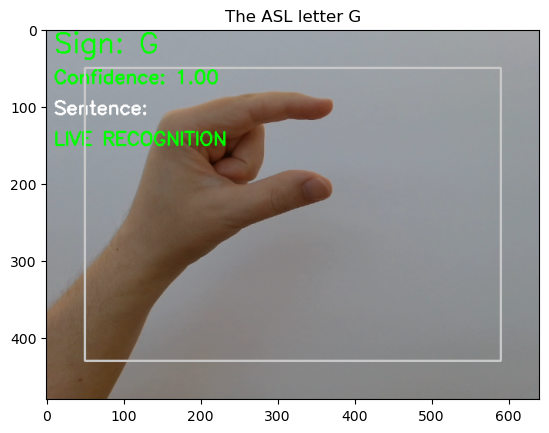

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image01 = mpimg.imread('Letter G.png')
plt.imshow(image01)
plt.title("The ASL letter G")
plt.show()

### The Word DOGS.png image file was opened in the notebook window and labeled.

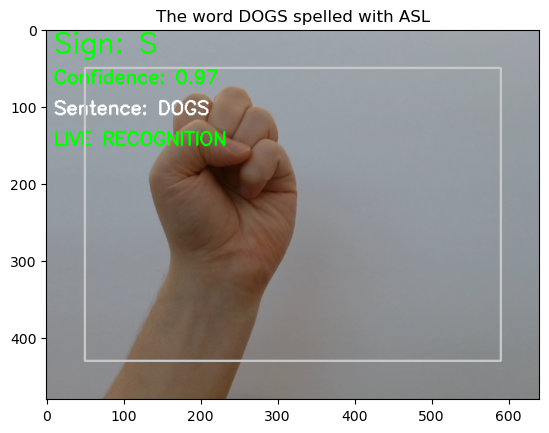

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image02 = mpimg.imread('Word DOGS.png')
plt.imshow(image02)
plt.title("The word DOGS spelled with ASL")
plt.show()

### Code testing that the columns in the confdata.csv file could be read.

In [1]:
import pandas as pd

csv_path = r"C:\Users\tudor\Documents\ece_5831\project\confdata.csv"
df = pd.read_csv(csv_path)
print(df.columns)

Index(['true_label', 'pred_label'], dtype='object')


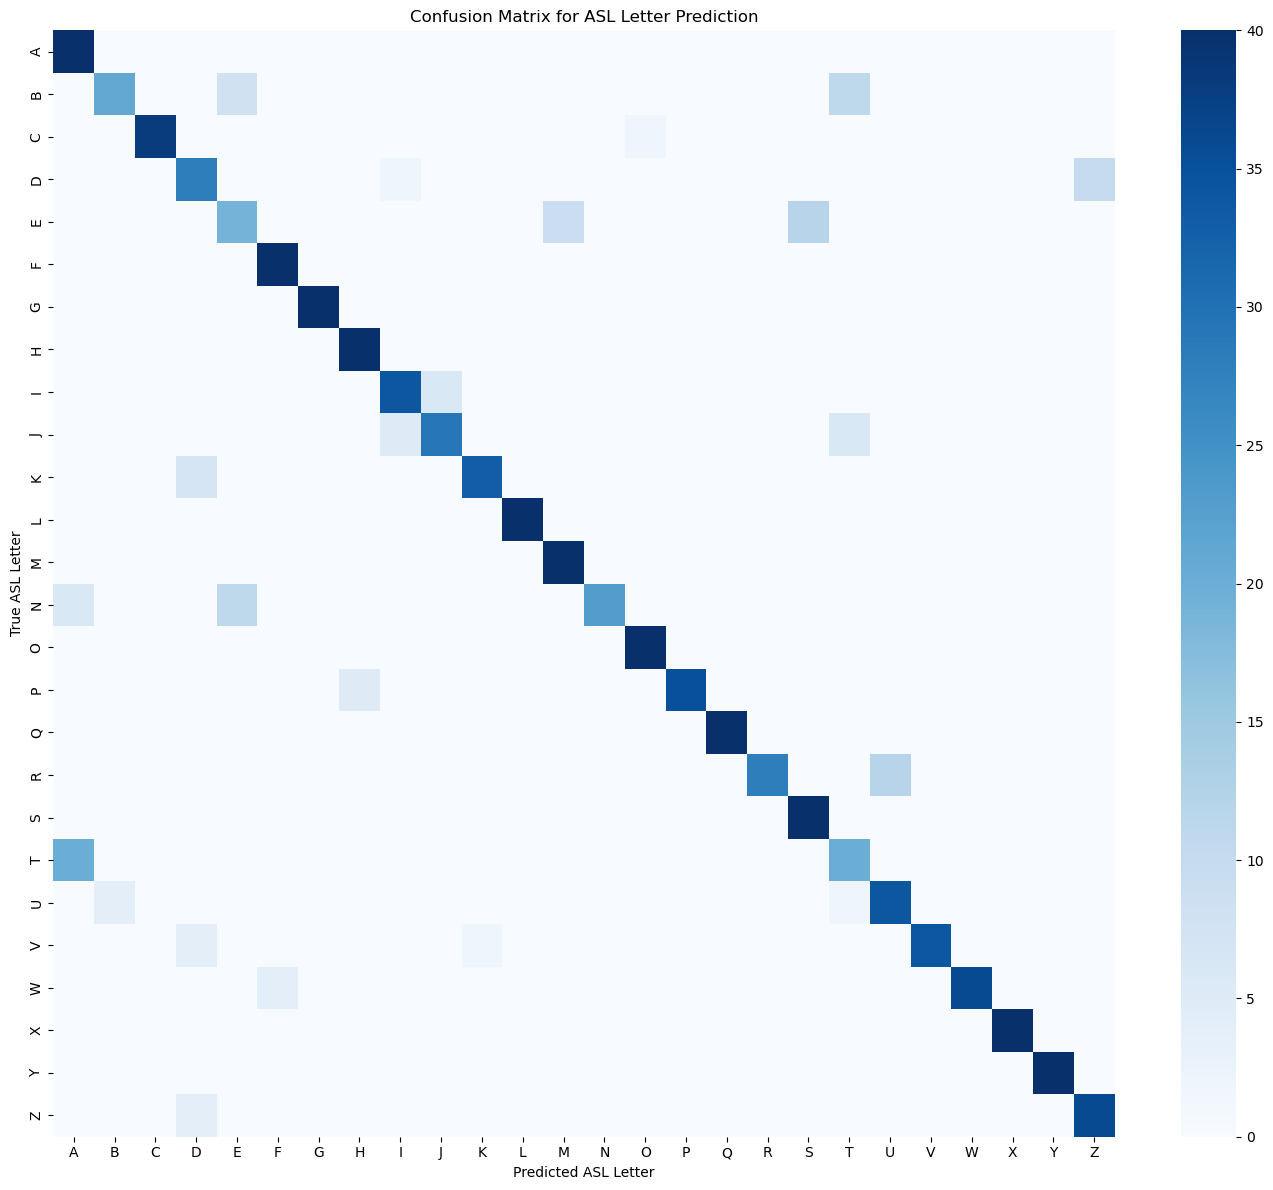

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import string

# Load confdata.csv from the csv path
csv_path = r"C:\Users\tudor\Documents\ece_5831\project\confdata.csv"  
df = pd.read_csv(csv_path)

# Define class labels for letters A-Z
labels = list(string.ascii_uppercase)  # ['A', 'B', ..., 'Z']

# If labels are letters (A-Z) use string type
y_true = df["true_label"].astype(str)
y_pred = df["pred_label"].astype(str)

# Compute the cells of the confusion matrix
cm = confusion_matrix(
    y_true,
    y_pred,
    labels=labels
)

# Convert to a dataframe 
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Build the onfusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(
    cm_df,
    annot=False,       # set True if dataset is small
    cmap="Blues",
    fmt="d"
)
# Label axes and add a title
plt.xlabel("Predicted ASL Letter")
plt.ylabel("True ASL Letter")
plt.title("Confusion Matrix for ASL Letter Prediction")
plt.tight_layout()
plt.show()